<a href="https://colab.research.google.com/github/CookiesAndWater/MAT_422/blob/main/MAT422_1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.3.1 QR Decomposition

* **QR Decomposition**: A process to solve the linear least squares problem. It is where we turn the matrix A into two different matrices. It is the equation, $A = QR$.
 * A represents the matrix in which we are decomposing.
 * Q represents an orthogonal matrix, where the Gram-Schmidt algorithm is used to obtain an orthonormal basis from matrix A.
 * R represents an upper triangular matrix. Can be solved after solving for Q by reranging the equation to $R=Q^{T}A$.


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#The original matrix
A = np.array([[1,3],
              [1,-1]])
print("The original matrix A: ")
print(A,"\n")

#QR decomposition done by numpy
Q , R = np.linalg.qr(A,mode = 'complete')
print("The matrix Q, which is orthogonormal: ")
print(Q, "\n")
print("The matrix R, which is the upper triangular matrix: ")
print(R, "\n")

#QR
print("The product of QR, which is equivalent to A: ")
print(np.dot(Q,R))

The original matrix A: 
[[ 1  3]
 [ 1 -1]] 

The matrix Q, which is orthogonormal: 
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]] 

The matrix R, which is the upper triangular matrix: 
[[-1.41421356 -1.41421356]
 [ 0.         -2.82842712]] 

The product of QR, which is equivalent to A: 
[[ 1.  3.]
 [ 1. -1.]]


The original matrix is A. Q is the orthogonal matrix of A and R is the upper triangular matrix of Q. The numpy library has a built-in algorithm(np.linalg.qr) that can give the orthogonal matrix of Q and R. We multiply QR and are to double check if it is equivalent to A.

## 1.3.2 Least-Square Problem

* **Least-Square Problem**: A way to minimize the sum squared residuals, or in other words, find an x such that the equation $min_{x ∈ R^{m}}||Ax - b||$ satisfies $A^{T}Ax = A^{T}b$.
 * A is an $n × m$ matrix that is linearly independent and b is a vector of length n.
 * We can also solve this using QR Decomposition(since the approach above can have numerical issues).

In [18]:
A = np.array([[1,2],
              [3,4]])
b = np.array([5,6])

x , residuals , rank , singularValues = np.linalg.lstsq(A,b,rcond=-1)
# x is the answer to the least square problem
print("The answer, x, to the equation is: ")
print(x,"\n")
#We want to reduce the residual as much as possible
print("The residual that we want to reduce to zero is: ")
print(residuals, "\n")

#Ax - b
print("The product of A and x: ")
print(np.dot(A,x),)
print("The matrix b: ")
print(b)
print("\n")

print("We see the product Ax and b are the same\n")

#(A^T)Ax = (A^t)b
print("The product of (A^T) * A * x: ")
print(np.dot(np.dot(np.transpose(A),A), x))
print("The product of (A^T) * b: ")
print(np.dot(np.transpose(A),b),"\n")

print("We also see (A^T)Ax=(A^T)b")


The answer, x, to the equation is: 
[-4.   4.5] 

The residual that we want to reduce to zero is: 
[] 

The product of A and x: 
[5. 6.]
The matrix b: 
[5 6]


We see the product Ax and b are the same

The product of (A^T) * A * x: 
[23. 34.]
The product of (A^T) * b: 
[23 34] 

We also see (A^T)Ax=(A^T)b


x is the answer to the equations, $min_{x ∈ R^{m}}||Ax - b||$ and $A^{T}Ax = A^{T}b$. The residual doesn't have anything in it, meaning that the residual is reduced as much as possible. I also double checked both equations by plugging values, and got the same answer.

## 1.3.3 Linear Regression


* **Linear Regression**: In simple terms, the best way to fit a line to a set of data points such that the sum of residuals is minimized.
Mathematically, finding coefficents to $β{j}$'s that minimize $∑^{n}_{i=1} (y_{i} - \hat{y}_{i})^{2} $, where $\hat{y}_{i} = β_{0} + ∑^{d}_{j=1} β_{j} x_{ij}$. Used to find the relation between two variables.
  * To put it in terms we are more familiar with (or at least I understand more), $\hat{y}_{i} = β_{0} + ∑^{d}_{j=1} β_{j} x_{ij}$ is similiar to the equation y = mx + b, where $β_{0}$ is equivalent to the y-intercept (b) and $β_{1}$ is equivalent to slope (m).
  * $\hat{y}_{i}$ is the predicted values(The line of linear regression) and $y_{i}$ is the observed data (The data points on the graph)
  * Can be solved using least-squares problem.


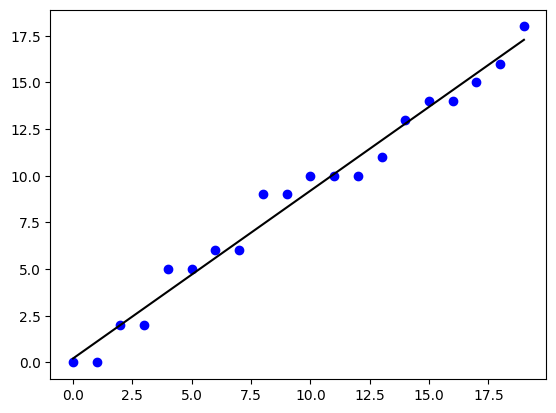

In [19]:
#Random points on a graph
xpoints = np.arange(0,20).reshape((-1,1))
ypoints = np.random.randint(20, size = 20)
#Make the data ascend and somewhat uniform
ypoints.sort()
#Plot the x and y data
plt.plot(xpoints, ypoints, color='blue', marker='o', linestyle = 'none')
#The whole linear regression solver(from sklearn library)
model = LinearRegression().fit(xpoints, ypoints)
#Plot the y = mx + b(the linear regression line)
plt.plot(xpoints,(xpoints * model.coef_) + model.intercept_, color = 'black', linestyle = 'solid')
plt.show()


The graph above is generated using random data points, where xpoints represents the x-values and ypoints represent the y-values. The ypoints.sort() is used to make the data more uniform, as without it the data points would be to random to find any correlation. The linear regression is put into the variable "model", where we can find the y-intercept(model.intercept_) and the x-intercept(model.coef_). We then graph the linear regression line and get the best fit.
